## **Data Preparation**

Import library yang akan digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import uniform

In [ ]:
pd.set_option('display.max_rows', None) #Untuk menampilkan nama-nama seluruh kolom yang terdapat dalam dataframe dari kolom awal sampai akhir 
pd.set_option('display.max_columns', None) #Untuk menampilkan seluruh baris data yang dimiliki oleh dataframe dari data indeks 0 sampai indeks akhir
warnings.filterwarnings('ignore')

Mengunggah dataset : 

application train, previous application, dan bureau

In [ ]:
# Menghubungkan google colab ke grive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Impor dataset application_train
application_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Zenius/application_train.csv")
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
# Impor dataset application_test
application_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Zenius/application_test.csv")
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170,-812,NaN,1,1,0,1,0,1,NaN,2,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175,-3503,5.0,1,1,0,1,0,0,Drivers,2,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment

In [ ]:
# Impor dataset previous_application
previous_application = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Zenius/previous_application.csv")
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
bureau = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Zenius/previous_application.csv")
bureau.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


Jumlah peminjaman Home Credit sebelumnya pada tiap pelanggan

In [ ]:
prev = previous_application.groupby(['SK_ID_CURR'])['SK_ID_CURR'].agg(['count']).reset_index()
prev.columns = ['SK_ID_CURR','TOTAL_PREV']
prev.head()

,SK_ID_CURR,TOTAL_PREV
0,100001,1
1,100002,1
2,100003,3
3,100004,1
4,100005,2


Jumlah kredit tiap pelanggan di Biro Kredit

In [ ]:
bureau_credit = bureau.groupby(['SK_ID_CURR'])['SK_ID_CURR'].agg(['count']).reset_index()
bureau_credit.columns = ['SK_ID_CURR','TOTAL_BUREAU_LOAN']
bureau_credit.head()

,SK_ID_CURR,TOTAL_BUREAU_LOAN
0,100001,1
1,100002,1
2,100003,3
3,100004,1
4,100005,2


Menggabungkan dataset previous application dan bureau kredit dengan left join 

In [ ]:
df = (application_train.merge(prev, how='left', on='SK_ID_CURR')).merge(bureau_credit, how='left', on='SK_ID_CURR')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV,TOTAL_BUREAU_LOAN
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

**Exploratory Data Analysis**

Memeriksa adanya missing value 

In [ ]:
total_null = df.isnull().sum() #variabel total_null yang membuat kolom - kolom di df beserta jumlah null dari kolom tersebut
persen = (df.isnull().sum()/len(df.index)*100) #variabel persen untuk memuat nilai persen dari jumlah null setiap kolom 
data_null  = pd.concat([total_null, persen], axis=1, keys=['Total Null', 'Persen']).reset_index() #variabel data null yang berisi penggabungan data total null dan persen

In [ ]:
data_null[(data_null['Persen'] > 0)].sum()

index         AMT_ANNUITYAMT_GOODS_PRICENAME_TYPE_SUITEOWN_C...
Total Null                                              9185373
Persen                                              2987.006318
dtype: object

In [ ]:
data_null[(data_null['Persen'] > 60)].sort_values(by='Persen', ascending=False) #menampilkan kolom dengan persen null lebih dari 60 

,index,Total Null,Persen
76,COMMONAREA_MEDI,214865,69.872297
48,COMMONAREA_AVG,214865,69.872297
62,COMMONAREA_MODE,214865,69.872297
84,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
56,NONLIVINGAPARTMENTS_AVG,213514,69.432963
70,NONLIVINGAPARTMENTS_MODE,213514,69.432963
86,FONDKAPREMONT_MODE,210295,68.386172
54,LIVINGAPARTMENTS_AVG,210199,68.354953
82,LIVINGAPARTMENTS_MEDI,210199,68.354953
68,LIVINGAPARTMENTS_MODE,210199,68.354953


*   Pada dataset ini, terdapat 69 variabel yang memiliki missing value 
*   Terdapat 17 variabel dengan jumlah missing value >60%

Memeriksa data duplikat

In [ ]:
df.duplicated().sum()

0

Tidak ada data duplikat

Melihat tipe data pada variabel yang ada

In [ ]:
df.dtypes.value_counts()

float64    67
int64      41
object     16
dtype: int64

*   Ada 67 Feature bertipe float
*   Ada 41 Feature bertipe integer
*   Ada 16 Feature bertipe object




Feature Target :
*   0 : pinjaman dibayar tepat waktu
*   1 : terdapat kesulitan untuk membayar pinjaman



In [ ]:
# Melihat jumlah target 0 dan 1
df["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

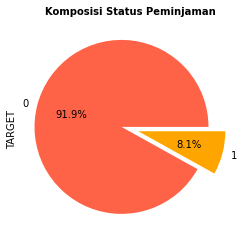

In [ ]:
plt.title("Komposisi Status Peminjaman", fontsize=10, weight="bold")
df["TARGET"].value_counts().plot.pie(explode=[0.1,0.1], labels=["0","1"], autopct='%1.1f%%', colors=['tomato','orange']);

Komposisi status peminjaman yang dibayar tepat waktu sebanyak 91.9%. Hal ini menunjukkan bahwa mayoritas peminjam sudah membayar pinjaman tepat waktu. Selain itu, terdapat 8.1% pelanggan yang masih terdapat kesulitan untuk membayar pinjaman.

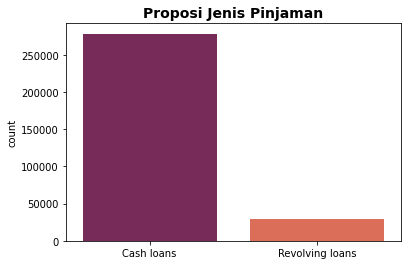

In [ ]:
plt.title("Proposi Jenis Pinjaman", fontsize=14, weight="bold")
sns.countplot(df.NAME_CONTRACT_TYPE.values, data=df, palette='rocket')
plt.show()

*   Cash loans merupakan kredit yang berupa penyediaan dana tunai yang dipindahbukukan ke rekening nasabah untuk digunakan sesuai dengan tujuan kreditnya.
*   Revolving Loans merupakan kredit untuk pembiayaan modal kerja yang bersifat permanen, yang jumlahnya tercermin dalam cash flow perusahaan.
*   Mayoritas pelanggan melakukan peminjaman uang dengan tipe pinjaman Cash loans.

In [ ]:
# Melihat jumlah masing-masing tipe gender
df["CODE_GENDER"].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

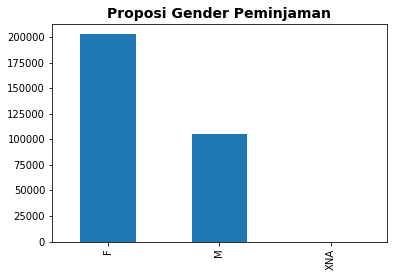

In [ ]:
plt.title("Proposi Gender Peminjaman", fontsize=14, weight="bold")
df["CODE_GENDER"].value_counts().plot.bar();

Proporsi gender peminjam menunjukkan peminjam perempuan lebih banyak daripada laki-laki, dan terdapat variabel yang tidak diketahui, yaitu "XNA"

Mayoritas peminjam tidak memiliki anak 

In [ ]:
# Melihat jumlah peminjam berdasarkan jumlah anak
df['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

In [ ]:
# Melihat jumlah peminjam berdasarkan status pernikahannya
df.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

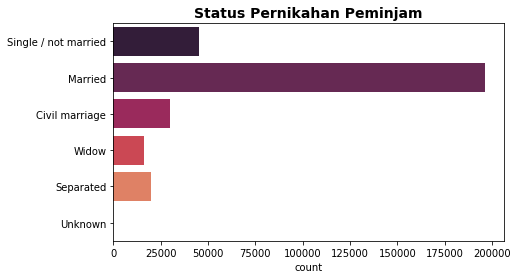

In [ ]:
plt.figure(figsize=(7,4))
plt.title("Status Pernikahan Peminjam", fontsize=14, weight="bold")
sns.countplot(y = df.NAME_FAMILY_STATUS.values, data=df, palette= 'rocket')
plt.show()

Mayoritas peminjam sudah berstatus menikah sehingga dapat diasusmsikan bahwa peminjam yang telat untuk membbayarkan pinjaman mereka karena harus mengeluarkan uangnya untuk kebutuhan rumah tangga mereka.

In [ ]:
# Melihat jumlah peminjam berdasarkan tempat tinggalnya
df.NAME_HOUSING_TYPE.value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

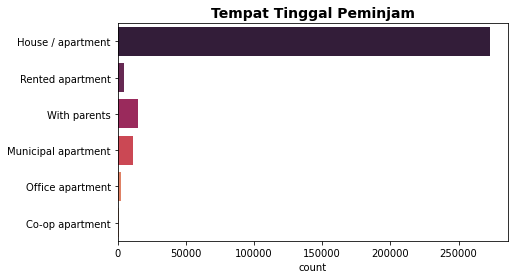

In [ ]:
plt.figure(figsize=(7,4))
plt.title("Tempat Tinggal Peminjam", fontsize=14, weight="bold")
sns.countplot(y = df.NAME_HOUSING_TYPE.values, data=df, palette= 'rocket')
plt.show()

Mayoritas peminjam memiliki rumah/apartemen sendiri sebagai hunian mereka. Hal ini membuktikan bahwa mungkin peminjam tidak mampu membayarkan pinjaman mereka karena peminjam harus membayarkan angsuran dari rumah/apartemen mereka

In [ ]:
# Melihat jumlah peminjam berdasarkan status pendidikan
df['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

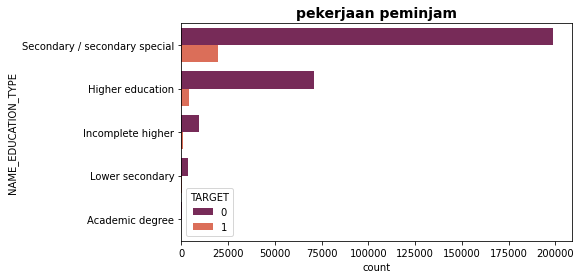

In [ ]:
plt.figure(figsize=(7,4))
plt.title("pekerjaan peminjam", fontsize=14, weight="bold")
pendidikan = sns.countplot(data=df, y='NAME_EDUCATION_TYPE', hue='TARGET',palette = "rocket");
plt.show()

Tingkat pendidikan peminjam didominasi oleh tingkat pendidikan Secondary, dan kebanyakan peminjam dengan tingka pendidikan higher education dan secondary special dapat membayarkan pinjaman mereka

Data group berdasarkan target dan jenis pekerjaan

In [ ]:
pekerjaan = pd.DataFrame(data=df.groupby(['OCCUPATION_TYPE','TARGET']).count()['SK_ID_CURR']).reset_index()

Jumlah pelanggan berdasarkan target dan jenis pekerjaan

In [ ]:
value_counts = pekerjaan['SK_ID_CURR'].values

def repayers_to_applicants_ratio(values):
    flag = 1
    rasio = []
    for count in range(len(values)):
        if flag == 1:
            current_number = values[count]
            next_number = values[count+1]
            rasio.append(current_number/(current_number+next_number))
            rasio.append(current_number/(current_number+next_number))
        flag=flag*-1
    return rasio        

Rasio pelanggan yang mampu membayar pinjaman berdasarkan jenis pekerjaan

In [ ]:
pekerjaan['Rasio R/A'] = repayers_to_applicants_ratio(value_counts)

In [ ]:
dfrasio = pekerjaan.groupby(['OCCUPATION_TYPE','Rasio R/A']).count().drop(['TARGET', 'SK_ID_CURR'],axis=1).reset_index() 

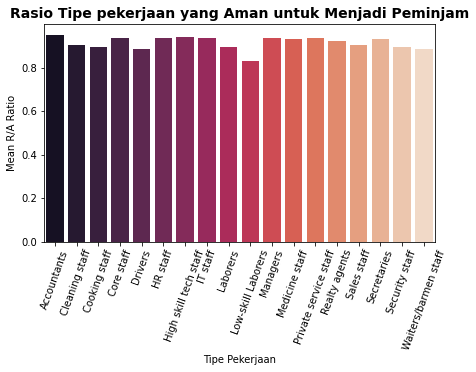

In [ ]:
plt.figure(figsize=(7,4))
plt.title("Rasio Tipe pekerjaan yang Aman untuk Menjadi Peminjam", fontsize=14, weight="bold")
sns.barplot(x='OCCUPATION_TYPE', y='Rasio R/A', data=dfrasio, palette=('rocket'))
plt.xticks(rotation=70)
plt.xlabel("Tipe Pekerjaan")
plt.ylabel("Mean R/A Ratio")
plt.show()

Terlihat bahwa tipe pekerjaan akuntan yaitu tipe pekerjaan yang dikategorikan aman untuk diberikan pinjaman oleh lembaga peminjam dengan Rasio 0.95. Sedangkan tipe pekerjaan yang dikategorikan kurang aman untuk diberikan pinjaman adalah tipe pekerjaan buruh dengan keterampilan rendah *(low-skill laborers)* dengan rasio 0.82

## **Data Cleansing and Data Preprocessing**

In [ ]:
#Untuk mengetahui jumlah baris dan kolom yang dimiliki oleh dataframe df
df.shape

(307511, 124)

In [ ]:
#Converting DAYS_BIRTH to AGE untuk mendapatkan umur pelanggan

#membuat kolom AGE yang memuat nilai hasil pembagian nilai yang terdapat dalam kolom DAYS_BIRTH dengan -365
#Lalu, hasil pembagian dibulatkan dan diubah tipe data menjadi integer
df['AGE'] = round((df['DAYS_BIRTH']/-365), 0).astype(int)

#menghapus kolom DAYS_BIRTH 
df.drop(columns='DAYS_BIRTH', inplace=True)

In [ ]:
df['AGE'].describe() #untuk menampilkan ringkasan statistik, seperti rata-rata, simpangan baku, min, dan maks untuk kolom age

count    307511.000000
mean         43.938646
std          11.964047
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: AGE, dtype: float64

In [ ]:
#membuat kelompok umur dari pelanggan
grp_age = df[['TARGET', 'AGE']] #variabel grp_age yang berisi kolom target dan age dari df_main
grp_age['AGE_GROUP'] = pd.cut(grp_age['AGE'], bins = np.linspace(20, 70, num=6)) #membuat kolom age group 
#dimana nilai grup dimulai dari 20 sampai dengan 70 dan membuat 5 grup 
grp_age = (grp_age.groupby(['AGE_GROUP']).mean()).sort_values('TARGET') 
#grp_age berisi nilai rata-rata dari target dan age yang dikelompokan berdasarkan age group dan diurutkan berdasarkan target
grp_age


,TARGET,AGE
AGE_GROUP,,
"(60.0, 70.0]",0.049247,63.682548
"(50.0, 60.0]",0.060363,55.455787
"(40.0, 50.0]",0.075819,45.258459
"(30.0, 40.0]",0.094346,35.615525
"(20.0, 30.0]",0.114449,26.887741


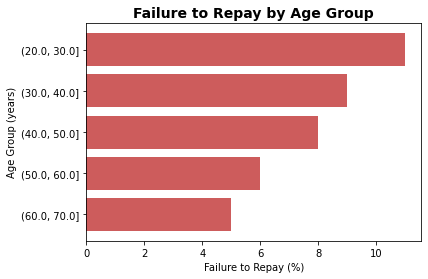

In [ ]:
#Memvisualisasikan tingkat gagal bayar dari setiap kelompok umur menggunakan barplot
plt.barh(grp_age.index.astype(str), round(100*grp_age['TARGET']), color='indianred')
plt.ylabel('Age Group (years)')
plt.xlabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group', fontsize=14, weight="bold");
plt.show()

Dari diagram yang ditampilkan dapat disimpulkan bahwa, pelanggan dalam rentang umur 20 tahun sampai dengan 30 tahun lebih cenderung tidak membayar kembali pinjaman atau default dengan tingkat gagal bayar di atas 10%. 

In [ ]:
#Converting DAYS_EMPLOYED to YEARS EMPLOYED

#membuat kolom YEARS_EMPLOYED yang memuat nilai hasil pembagian nilai yang terdapat dalam kolom DAYS_EMPLOYED dengan -365
#Lalu, hasil pembagian dibulatkan dan diubah tipe data menjadi integer
df['YEARS_EMPLOYED'] = round((df['DAYS_EMPLOYED']/-365), 0).astype(int)
#menghapus kolom DAYS_EMPLOYED
df.drop(columns='DAYS_EMPLOYED', inplace=True)

In [ ]:
df['YEARS_EMPLOYED'].describe()#untuk menampilkan ringkasan statistik, seperti rata-rata, simpangan baku, min, dan maks untuk kolom years employed

count    307511.000000
mean       -174.895337
std         387.185661
min       -1001.000000
25%           1.000000
50%           3.000000
75%           8.000000
max          49.000000
Name: YEARS_EMPLOYED, dtype: float64

Berdasarkan ringkasan statistik yang ditampilkan, dapat dilihat bahwa nilai min dari years employed adalah -1000 dan hal tersebut termasuk anomali karena tidak mungkin minimal kerja dari pelanggan adalah -1000 tahun. 

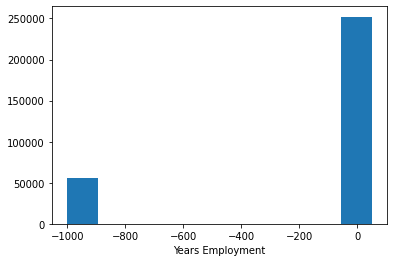

In [ ]:
#Menampilkan distribusi dari years_employed
plt.hist(df['YEARS_EMPLOYED'])
plt.xlabel('Years Employment')
plt.show()

Berdasarkan grafik di atas, diketahui bahwa pada data YEAR EMPLOYED terdapat anomali.

In [ ]:
#mengganti anomali value atau min dengan NaN
df['YEARS_EMPLOYED'].replace({df['YEARS_EMPLOYED'].min(): np.nan}, inplace=True)

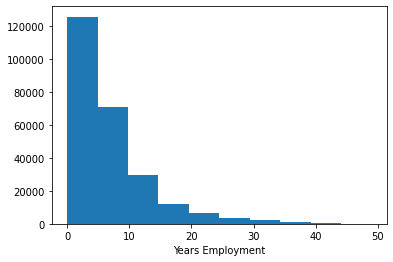

In [ ]:
#menampilkan histogram untuk distribusi years employed setelah menangani anomali value
plt.hist(df['YEARS_EMPLOYED'])
plt.xlabel('Years Employment')
plt.show()

In [ ]:
#membuat kelompok lama kerja pelanggan dalam tahun 
grp_employ = df[['TARGET', 'YEARS_EMPLOYED']] #variabel grp_employ yang berisi kolom target dan years employed dari df_main
grp_employ['YEARS_EMPLOYED_GROUP'] = pd.cut(grp_employ['YEARS_EMPLOYED'], bins = np.linspace(0, 50, num=6)) #membuat kolom years employ group 
#dimana nilai grup dimulai dari 0 sampai dengan 50 dan membuat 5 grup 
grp_employ = (grp_employ.groupby(['YEARS_EMPLOYED_GROUP']).mean()).sort_values('TARGET')
#grp_age berisi nilai rata-rata dari target dan years employed group yang dikelompokan berdasarkan years employed group dan diurutkan berdasarkan target

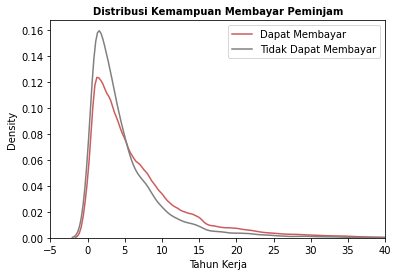

In [ ]:
#memvisualisasi distribusi kemampuan pelanggan membayar pinjaman berdasarkan lama bekerja
plt.title("Distribusi Kemampuan Membayar Peminjam",fontsize=10,weight="bold")
sns.distplot(df[df['TARGET']==0]['YEARS_EMPLOYED'], hist=False, label="Dapat Membayar", color = 'indianred')
sns.distplot(df[df['TARGET']==1]['YEARS_EMPLOYED'], hist=False, label="Tidak Dapat Membayar", color = 'grey')
plt.xlim([-5,40])
plt.xlabel("Tahun Kerja")
plt.legend();

Berdasarkan displot yang telah ditampilkan, diketahui bahwa pelanggan dengan masa kerja kurang dari 5 tahun, terutama pekerja dengan masa kerja kurang dari 2 tahun cenderung untuk tidak dapat membayarkan kembali pinjaman atau default. Sebaliknya, pelanggan dengan masa kerja lebih dari 5 tahun lebih cenderung dapat membayarkan pinjamannya.

In [ ]:
#Converting DAYS_REGISTRATION to YEARS_REGISTRATION

#membuat kolom YEARS_REGISTRATION yang memuat nilai hasil pembagian nilai yang terdapat dalam kolom DAYS_REGISTRATION dengan -365
#Lalu, hasil pembagian dibulatkan dan diubah tipe data menjadi integer
df['YEARS_REGISTRATION'] = round((df['DAYS_REGISTRATION']/-365), 0).astype(int)
#menghapus kolom DAYS_REGISTRATION
df.drop(columns='DAYS_REGISTRATION', inplace=True)

In [ ]:
df['YEARS_REGISTRATION'].describe()#untuk menampilkan ringkasan statistik, seperti rata-rata, simpangan baku, min, dan maks untuk kolom years registration

count    307511.000000
mean         13.659440
std           9.659369
min           0.000000
25%           6.000000
50%          12.000000
75%          20.000000
max          68.000000
Name: YEARS_REGISTRATION, dtype: float64

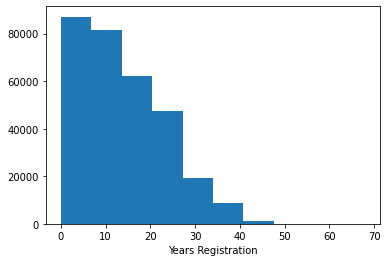

In [ ]:
#memvisualisasikan distribusi nilai dari kolom years registration menggunakan histogram 
plt.hist(df['YEARS_REGISTRATION'])
plt.xlabel('Years Registration')
plt.show()

In [ ]:
#membuat kelompok lama waktu registrasi dalam tahun 
grp_regist = df[['TARGET', 'YEARS_REGISTRATION']] #variabel grp_regist yang berisi kolom target dan years registration dari df
grp_regist['YEARS_REGISTRATION_GROUP'] = pd.cut(grp_regist['YEARS_REGISTRATION'], bins = np.linspace(0, 70, num=8))#membuat kolom years regist group 
#dimana nilai grup dimulai dari 0 sampai dengan 70 dan membuat 7 grup 
grp_regist = (grp_regist.groupby(['YEARS_REGISTRATION_GROUP']).mean())
#grp_age berisi nilai rata-rata dari target dan years employed group yang dikelompokan berdasarkan years registration group dan diurutkan berdasarkan target
grp_regist

,TARGET,YEARS_REGISTRATION
YEARS_REGISTRATION_GROUP,,
"(0.0, 10.0]",0.089018,5.111803
"(10.0, 20.0]",0.082636,14.994528
"(20.0, 30.0]",0.065393,24.813166
"(30.0, 40.0]",0.056071,34.209956
"(40.0, 50.0]",0.041252,43.170697
"(50.0, 60.0]",0.033333,53.966667
"(60.0, 70.0]",0.111111,63.111111


In [ ]:
#Untuk menampilkan unique value beserta jumlahnya dari setiap kolom di df
for col in df.select_dtypes("object").columns: #perulangan dengan kondisi untuk col yang terdapat dalam list kolom bertipe data object
  print(df[col].value_counts()) #menampilkan jumlah dari setiap unique value di kolom 
  print()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAM

Dari output di atas, dapat dilihat bahwa kolom yang memiliki XNA sebagai unique value adalah CODE_GENDER dan ORGANIZATION_TYPE

In [ ]:
df['CODE_GENDER'].replace("XNA", np.nan, inplace=True) #Mengubah nilai XNA menjadi NaN di kolom Code Gender 
df['ORGANIZATION_TYPE'].replace("XNA", np.nan, inplace=True) #mengubah nilai XNA menjadi NaN di kolom Organization Type 

Handling Missing Value

In [ ]:
#Menghapus kolom dengan jumlah null lebih dari 60 %
df.drop(columns=list(data_null['index'].loc[data_null['Persen'] >60]), inplace=True)
df.shape

(307511, 107)

In [ ]:
null = df.isnull().sum().reset_index() #variabel null memuat nama kolom serta jumlah null dari setiap kolom 
null_table = null.loc[null[0] > 0] #variabel null_table hanya membuat kolom dengan jumlah null lebih dari 0
null_table.shape

(55, 2)

Terdapat 55 kolom yang memiliki missing value kurang dari 60%.

In [ ]:
col_numeric = df.select_dtypes(exclude = ["object"] ).columns #variabel col_numeric = membuat kolom yang bertipe data selain object 

#perulangan untuk mengisi nilai null dalam kolom dengan median
for col in col_numeric :
  df[col] = df[col].fillna(df[col].median())


col_object = df.select_dtypes(include = ["object"]).columns #variabel col_object yang memuat kolom bertipe data object 

#perulangan untuk mengisi nilai null dalam kolom object dengan modus
for col in col_object :
  df[col] = df[col].fillna(df[col].mode().iloc[0])

In [ ]:
null = df.isnull().sum().reset_index() #variabel null memuat kolom berserta jumlah nilai null di df
null_table = null.loc[null[0] > 0] #null_table memuat kolom yang null lebih dari 0
null_table.shape[0]

0

In [ ]:
# Menyimpan tabel yang sudah dibersihkan
df.to_csv('/content/Dataset_HCI_Ready.csv')

Dapat dilihat bahwa jumlah null dalam seluruh kolom di dataframe df adalah 0.

In [ ]:
#Converting DAYS_ID_PUBLISH to YEARS_PUBLISHED

#membuat kolom YEARS_PUBLISHED yang memuat nilai hasil pembagian nilai yang terdapat dalam kolom DAYS_ID_PUBLISH dengan -365
#Lalu, hasil pembagian dibulatkan dan diubah tipe data menjadi integer
df['YEARS_PUBLISHED'] = round((df['DAYS_ID_PUBLISH']/-365), 0).astype(int)
#menghapus kolom DAYS_ID_PUBLISH
df.drop(columns='DAYS_ID_PUBLISH', inplace=True)

In [ ]:
df['YEARS_PUBLISHED'].describe() #untuk menampilkan ringkasan statistik, seperti rata-rata, simpangan baku, min, dan maks untuk kolom years published

count    307511.000000
mean          8.198575
std           4.151520
min           0.000000
25%           5.000000
50%           9.000000
75%          12.000000
max          20.000000
Name: YEARS_PUBLISHED, dtype: float64

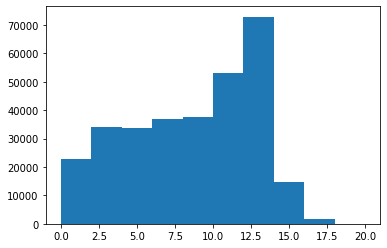

In [ ]:
#Memvisualisasi distribusi value dari kolom years published menggunakan histogram
plt.hist(df['YEARS_PUBLISHED'])
plt.show()

In [ ]:
grp_publish = df[['TARGET', 'YEARS_PUBLISHED']]#variabel grp_publish yang berisi kolom target dan YEARS_PUBLISHEDvdari df
grp_publish['YEARS_PUBLISHED_GROUP'] = pd.cut(grp_publish['YEARS_PUBLISHED'], bins = np.linspace(0, 20, num=6)) #membuat kolom YEARS_PUBLISHED_GROUP
#dimana nilai grup dimulai dari 0 sampai dengan 20 dan membuat 5 grup 
grp_publish = (grp_publish.groupby(['YEARS_PUBLISHED_GROUP']).mean())
#grp_age berisi nilai rata-rata dari target dan years published yang dikelompokan berdasarkan years group dan diurutkan berdasarkan target
grp_publish

,TARGET,YEARS_PUBLISHED
YEARS_PUBLISHED_GROUP,,
"(0.0, 4.0]",0.098844,2.537650
"(4.0, 8.0]",0.088782,6.545368
"(8.0, 12.0]",0.072191,10.890039
"(12.0, 16.0]",0.060282,13.462728
"(16.0, 20.0]",0.056180,17.011236


In [ ]:
#Converting DAYS_LAST_PHONE_CHANGE to YEAR_LAST_PHONE_CHANGE

#membuat kolom YEARS_LAST_PHONE_CHANGE yang memuat nilai hasil pembagian nilai yang terdapat dalam kolom DAYS_LAST_PHONE_CHANGE dengan -365
#Lalu, hasil pembagian dibulatkan dan diubah tipe data menjadi integer
df['YEAR_LAST_PHONE_CHANGE'] = round((df['DAYS_LAST_PHONE_CHANGE']/-365), 0).astype(int)
#menghapus kolom DAYS_LAST_PHONE_CHANGE
df.drop(columns='DAYS_LAST_PHONE_CHANGE', inplace=True)

In [ ]:
df['YEAR_LAST_PHONE_CHANGE'].describe() #untuk menampilkan ringkasan statistik, seperti rata-rata, simpangan baku, min, dan maks untuk kolom YEAR_LAST_PHONE_CHANGE

count    307511.000000
mean          2.632868
std           2.281341
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          12.000000
Name: YEAR_LAST_PHONE_CHANGE, dtype: float64

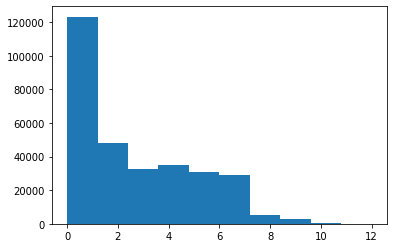

In [ ]:
#Memvisualisasi distribusi nilai dalam kolom YEAR_LAST_PHONE_CHANGE menggunakan histogram
plt.hist(df['YEAR_LAST_PHONE_CHANGE'])
plt.show()

In [ ]:
regex = re.compile('FLAG_DOCUMENT_')
col = [i for i in df.columns 
       if re.match(regex, i)]

In [ ]:
df['TOTAL_DOCUMENT'] = df['FLAG_DOCUMENT_2'] + df['FLAG_DOCUMENT_3'] + df['FLAG_DOCUMENT_4'] + df['FLAG_DOCUMENT_5'] + df['FLAG_DOCUMENT_6'] + df['FLAG_DOCUMENT_7'] + df['FLAG_DOCUMENT_8'] + df['FLAG_DOCUMENT_9'] + df['FLAG_DOCUMENT_10'] + df['FLAG_DOCUMENT_11'] + df['FLAG_DOCUMENT_12'] + df['FLAG_DOCUMENT_13'] + df['FLAG_DOCUMENT_14'] + df['FLAG_DOCUMENT_15'] + df['FLAG_DOCUMENT_16'] + df['FLAG_DOCUMENT_17'] + df['FLAG_DOCUMENT_18'] + df['FLAG_DOCUMENT_19'] + df['FLAG_DOCUMENT_20'] + df['FLAG_DOCUMENT_21'] 

In [ ]:
df.drop(columns = [i for i in df.columns if re.match(regex, i)], inplace=True)

In [ ]:
df['TOTAL_DOCUMENT'].value_counts()

1    270056
0     29549
2      7742
3       163
4         1
Name: TOTAL_DOCUMENT, dtype: int64

In [ ]:
doc_list = []
for index, column in df.iterrows():
    if column['TOTAL_DOCUMENT'] >= 1:
        doc = 1
    else:
        doc = 0
    doc_list.append(doc)

df['DOC_PROVIDED'] = doc_list


In [ ]:
#variabel doc_data yang memuat nilai rata-rata dari target yang dieklompokkan berdasarkan kolom DOC_PROVIDED
doc_data = df.groupby(['DOC_PROVIDED']).agg({'TARGET':'mean'}).reset_index()
doc_data

,DOC_PROVIDED,TARGET
0,0,0.055230
1,1,0.083439


In [ ]:
doc_data['DOC_PROVIDED'] = doc_data['DOC_PROVIDED'].astype(int) #mengubah tipe data kolom DOC_PROVIDED menjadi integer

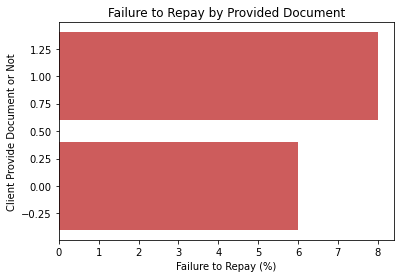

In [ ]:
plt.barh(range(0,2), round(100*doc_data['TARGET']), color='indianred')
plt.ylabel('Client Provide Document or Not')
plt.xlabel('Failure to Repay (%)')
plt.title('Failure to Repay by Provided Document')
plt.show()


In [ ]:
df = df.drop(['SK_ID_CURR'], 1) #menghapus kolom SK_ID_CURR 

###**Scaling Numerical Values**

In [ ]:
df[df.select_dtypes(exclude = ["object"]).columns].head() #menampilkan kolom dalam df yang bertipe data selain object

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV,TOTAL_BUREAU_LOAN,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_PUBLISHED,YEAR_LAST_PHONE_CHANGE,TOTAL_DOCUMENT,DOC_PROVIDED
0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0.0252,0.0383,0.9722,0.0000,0.0690,0.0833,0.0377,0.0198,0.0000,0.0250,0.0369,0.9722,0.00,0.0690,0.0833,0.0375,0.0193,0.0000,0.0149,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,26,2.0,10,6,3,1,1
1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,0.535276,0.0959,0.0529,0.9851,0.08,0.0345,0.2917,0.0130,0.0549,0.0098,0.0924,0.0538,0.9851,0.0806,0.0345,0.2917,0.0128,0.0554,0.0000,0.0968,0.0529,0.9851,0.08,0.0345,0.2917,0.0132,0.0558,0.0100,0.0714,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,46,3.0,3,1,2,1,1
2,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.505998,0.555912,0.729567,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.0487,0.0749,0.0031,0.0688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,52,1.0,12,7,2,0,0
3,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.505998,0.650442,0.535276,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.0487,0.0749,0.0031,0.0688,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,9.0,52,8.0,27,7,2,1,1
4,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.505998,0.322738,0.535276,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.0487,0.0749,0.0031,0.0688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0,55,8.0,12,9,3,1,1


In [ ]:
#Melakukan scaling terhadap kolom yang bertipe data selain object menggunakan MinMaxScaler
scaler = MinMaxScaler()
scal_num = df.select_dtypes(exclude = ["object"]).columns
scal_numeric = scal_num[2:]
scalled = pd.DataFrame(df)
scalled[scal_numeric] = scaler.fit_transform(df[scal_numeric])

In [ ]:
df.head() #menampilkan 5 baris data awal dari df setelah melakukan proses scalling 

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV,TOTAL_BUREAU_LOAN,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_PUBLISHED,YEAR_LAST_PHONE_CHANGE,TOTAL_DOCUMENT,DOC_PROVIDED
0,1,Cash loans,M,N,Y,0,0.001512,0.090287,0.090032,0.077441,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.256321,1.0,1.0,0.0,1.0,1.0,0.0,Laborers,0.000000,0.5,0.5,WEDNESDAY,0.434783,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.072215,0.307542,0.155054,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0.0252,0.0383,0.9722,0.0000,0.0690,0.0833,0.0377,0.0198,0.0000,0.0250,0.0369,0.9722,0.00,0.0690,0.0833,0.0375,0.0193,0.0000,block of flats,0.0149,"Stone, brick",No,0.005747,0.058824,0.005814,0.083333,0.0,0.0,0.0,0.0,0.0,0.04,0.000000,0.000000,0.104167,0.040816,0.147059,0.30,0.250000,0.25,1.0
1,0,Cash loans,F,N,N,0,0.002089,0.311736,0.132924,0.271605,Family,State servant,Higher education,Married,House / apartment,0.045016,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,0.052632,0.0,0.0,MONDAY,0.478261,0.0,0.0,0.0,0.0,0.0,0.0,School,0.312933,0.727773,0.597163,0.0959,0.0529,0.9851,0.08,0.0345,0.2917,0.0130,0.0549,0.0098,0.0924,0.0538,0.9851,0.0806,0.0345,0.2917,0.0128,0.0554,0.0000,0.0968,0.0529,0.9851,0.08,0.0345,0.2917,0.0132,0.0558,0.0100,block of flats,0.0714,Block,No,0.002874,0.000000,0.002907,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.027778,0.027778,0.520833,0.061224,0.044118,0.05,0.166667,0.25,1.0
2,0,Revolving loans,M,Y,Y,0,0.000358,0.022472,0.020025,0.023569,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.134897,1.0,1.0,1.0,1.0,1.0,0.0,Laborers,0.000000,0.5,0.5,MONDAY,0.391304,0.0,0.0,0.0,0.0,0.0,0.0,Government,0.518318,0.650190,0.814130,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.0487,0.0749,0.0031,block of flats,0.0688,Panel,No,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.645833,0.020408,0.176471,0.35,0.166667,0.00,0.0
3,0,Cash loans,F,N,Y,0,0.000935,0.066837,0.109477,0.063973,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.107023,1.0,1.0,0.0,1.0,0.0,0.0,Laborers,0.052632,0.5,0.5,WEDNESDAY,0.739130,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.518318,0.760751,0.597163,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.0487,0.0749,0.0031,block of flats,0.0688,P

###**Encoding Categorical Variables**

In [ ]:
df[df.select_dtypes(include = ["object"]).columns].head() #menampilkan kolom-kolom yang bertipe data object di dataframe df

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,block of flats,Panel,No
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,block of flats,Panel,No
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,block of flats,Panel,No


In [ ]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0) #menampilkan jumlah unique value dari setiap kolom di df

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             57
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Melakukan encoding menggunakan label encoder untuk kolom dengan 2 unique value. 

In [ ]:
#Mengubah data ketegori menjadi data numerik untuk kolom dengan 2 unique value
le = LabelEncoder()
le_count = 0

for col in df:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])            
            le_count += 1
           
print('Total label encoded columns: %d' % le_count)

Total label encoded columns: 5


In [ ]:
df.head()#menampilkan 5 baris data awal dari df setelah melakukan proses label ncoding

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV,TOTAL_BUREAU_LOAN,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_PUBLISHED,YEAR_LAST_PHONE_CHANGE,TOTAL_DOCUMENT,DOC_PROVIDED
0,1,0,1,0,1,0,0.001512,0.090287,0.090032,0.077441,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.256321,1.0,1.0,0.0,1.0,1.0,0.0,Laborers,0.000000,0.5,0.5,WEDNESDAY,0.434783,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.072215,0.307542,0.155054,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0.0252,0.0383,0.9722,0.0000,0.0690,0.0833,0.0377,0.0198,0.0000,0.0250,0.0369,0.9722,0.00,0.0690,0.0833,0.0375,0.0193,0.0000,block of flats,0.0149,"Stone, brick",0,0.005747,0.058824,0.005814,0.083333,0.0,0.0,0.0,0.0,0.0,0.04,0.000000,0.000000,0.104167,0.040816,0.147059,0.30,0.250000,0.25,1.0
1,0,0,0,0,0,0,0.002089,0.311736,0.132924,0.271605,Family,State servant,Higher education,Married,House / apartment,0.045016,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,0.052632,0.0,0.0,MONDAY,0.478261,0.0,0.0,0.0,0.0,0.0,0.0,School,0.312933,0.727773,0.597163,0.0959,0.0529,0.9851,0.08,0.0345,0.2917,0.0130,0.0549,0.0098,0.0924,0.0538,0.9851,0.0806,0.0345,0.2917,0.0128,0.0554,0.0000,0.0968,0.0529,0.9851,0.08,0.0345,0.2917,0.0132,0.0558,0.0100,block of flats,0.0714,Block,0,0.002874,0.000000,0.002907,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.027778,0.027778,0.520833,0.061224,0.044118,0.05,0.166667,0.25,1.0
2,0,1,1,1,1,0,0.000358,0.022472,0.020025,0.023569,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.134897,1.0,1.0,1.0,1.0,1.0,0.0,Laborers,0.000000,0.5,0.5,MONDAY,0.391304,0.0,0.0,0.0,0.0,0.0,0.0,Government,0.518318,0.650190,0.814130,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.0487,0.0749,0.0031,block of flats,0.0688,Panel,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.645833,0.020408,0.176471,0.35,0.166667,0.00,0.0
3,0,0,0,0,1,0,0.000935,0.066837,0.109477,0.063973,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.107023,1.0,1.0,0.0,1.0,0.0,0.0,Laborers,0.052632,0.5,0.5,WEDNESDAY,0.739130,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.518318,0.760751,0.597163,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,0.0840,0.0746,0.9816,0.0000,0.1379,0.1667,0.0458,0.0731,0.0011,0.0864,0.0758,0.9816,0.00,0.1379,0.1667,0.0487,0.0749,0.0031,block of flats,0.0688,Panel,0,0.005747,0.000000,0.005814,0.000000,0

Melakukan encoding menggunakan one hot encoding untuk kolom dengan lebih dari 2 unique value. 

In [ ]:
le_count = 0

for col in df:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) > 2:
            onehots = pd.get_dummies(df[col])
            df = df.join(onehots)
            df.drop(columns=col, inplace=True)
            le_count += 1
           
print('Total one hot encoded columns: %d' % le_count)

Total one hot encoded columns: 10


In [ ]:
df.shape #menampilkan jumlah baris dan kolom dari df setelah melakukan one hot encoding ke variabel bertipe data object

(307511, 202)

In [ ]:
df.head()#menampilkan 5 baris data awal dari df setelah melakukan proses one hot ncoding

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TOTAL_PREV,TOTAL_BUREAU_LOAN,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_PUBLISHED,YEAR_LAST_PHONE_CHANGE,TOTAL_DOCUMENT,DOC_PROVIDED,Children,Family,Group of people,Other_A,Other_B,"Spouse, partner",Unaccompanied,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Civil marriage,Married,Separated,Single / not married,Unknown,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,FRIDAY,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY,Advertising,Agriculture,Bank,Business Entity Type 1,Business Entity Type 2,Business Entity Type 3,Cleaning,Construction,Culture,Electricity,Emergency,Government,Hotel,Housing,Industry: type 1,Industry: type 10,Industry: type 11,Industry: type 12,Industry: type 13,Industry: type 2,Industry: type 3,Industry: type 4,Industry: type 5,Industry: type 6,Industry: type 7,Industry: type 8,Industry: type 9,Insurance,Kindergarten,Legal Services,Medicine,Military,Mobile,Other,Police,Postal,Realtor,Religion,Restaurant,School,Security,Security Ministries,Self-employed,Services,Telecom,Trade: type 1,Trade: type 2,Trade: type 3,Trade: type 4,Trade: type 5,Trade: type 6,Trade: type 7,Transport: type 1,Transport: type 2,Transport: type 3,Transport: type 4,University,block of flats,specific housing,terraced house,Block,Mixed,Monolithic,Others,Panel,"Stone, brick",Wooden
0,1,0,1,0,1,0,0.001512,0.090287,0.090032,0.077441,0.256321,1.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.5,0.5,0.434783,0.0,0.0,0.0,0.0,0.0,0.0,0.072215,0.307542,0.155054,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0.0252,0.0383,0.9722,0.0000,0.0690,0.0833,0.0377,0.0198,0.0000,0.0250,0.0369,0.9722,0.00,0.0690,0.0833,0.0375,0.0193,0.0000,0.0149,0,0.005747,0.058824,0.005814,0.083333,0.0,0.0,0.0,0.0,0.0,0.04,0.000000,0.000000,0.104167,0.040816,0.147059,0.30,0.250000,0.25,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0.002089,0.311736,0.132924,0.271605,0.045016,1.0,1.0,0.0,1.0,1.0,0.0,0.052632,0.0,0.0,0.478261,0.0,0.0,0.0,0.0,0.0,0.0,0.312933,0.727773,0.597163,0.0959,0.0529,0.9851,0.08,0.0345,0.2917,0.0130,0.0549,0.0098,0.0924,0.0538,0.98

###**Feature Selection**

Correlation with Target

In [ ]:
df_corr = df.corr()['TARGET'].sort_values().reset_index()

In [ ]:
print('Most Positive Correlations:\n', df_corr.tail(9))

Most Positive Correlations:
                              index    TARGET
193         REG_CITY_NOT_LIVE_CITY  0.044395
194                 FLAG_EMP_PHONE  0.045982
195  Secondary / secondary special  0.049824
196         REG_CITY_NOT_WORK_CITY  0.050994
197                    CODE_GENDER  0.054713
198                        Working  0.057481
199           REGION_RATING_CLIENT  0.058899
200    REGION_RATING_CLIENT_W_CITY  0.060893
201                         TARGET  1.000000


In [ ]:
print('\nMost Negative Correlations:\n', df_corr.head(13))


Most Negative Correlations:
                      index    TARGET
0             EXT_SOURCE_2 -0.160295
1             EXT_SOURCE_3 -0.155892
2             EXT_SOURCE_1 -0.098887
3                      AGE -0.078263
4           YEARS_EMPLOYED -0.065095
5         Higher education -0.056593
6   YEAR_LAST_PHONE_CHANGE -0.054345
7          YEARS_PUBLISHED -0.051353
8                Pensioner -0.046209
9       YEARS_REGISTRATION -0.041820
10         AMT_GOODS_PRICE -0.039623
11           FLOORSMAX_AVG -0.039385
12          FLOORSMAX_MEDI -0.039157


In [ ]:
column = ['AMT_CREDIT','REG_CITY_NOT_LIVE_CITY','FLAG_EMP_PHONE','Secondary / secondary special','REG_CITY_NOT_WORK_CITY',
          'CODE_GENDER','Working','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
          'EXT_SOURCE_2','EXT_SOURCE_3','EXT_SOURCE_1','AGE','YEARS_EMPLOYED',
          'Higher education','YEAR_LAST_PHONE_CHANGE','YEARS_PUBLISHED','Pensioner',
          'YEARS_REGISTRATION','AMT_GOODS_PRICE','FLOORSMAX_AVG','FLOORSMAX_MEDI','TARGET']

In [ ]:
df_column = df[column]
df_column.head(10)

,AMT_CREDIT,REG_CITY_NOT_LIVE_CITY,FLAG_EMP_PHONE,Secondary / secondary special,REG_CITY_NOT_WORK_CITY,CODE_GENDER,Working,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,EXT_SOURCE_3,EXT_SOURCE_1,AGE,YEARS_EMPLOYED,Higher education,YEAR_LAST_PHONE_CHANGE,YEARS_PUBLISHED,Pensioner,YEARS_REGISTRATION,AMT_GOODS_PRICE,FLOORSMAX_AVG,FLOORSMAX_MEDI,TARGET
0,0.090287,0.0,1.0,1,0.0,1,1,0.5,0.5,0.307542,0.155054,0.072215,0.104167,0.040816,0,0.250000,0.30,0,0.147059,0.077441,0.0833,0.0833,1
1,0.311736,0.0,1.0,0,0.0,0,0,0.0,0.0,0.727773,0.597163,0.312933,0.520833,0.061224,1,0.166667,0.05,0,0.044118,0.271605,0.2917,0.2917,0
2,0.022472,0.0,1.0,1,0.0,1,1,0.5,0.5,0.650190,0.814130,0.518318,0.645833,0.020408,0,0.166667,0.35,0,0.176471,0.023569,0.1667,0.1667,0
3,0.066837,0.0,1.0,1,0.0,0,1,0.5,0.5,0.760751,0.597163,0.518318,0.645833,0.163265,0,0.166667,0.35,0,0.397059,0.063973,0.1667,0.1667,0
4,0.116854,0.0,1.0,1,1.0,1,1,0.5,0.5,0.377472,0.597163,0.518318,0.708333,0.163265,0,0.250000,0.45,0,0.176471,0.117845,0.1667,0.1667,0
5,0.111235,0.0,1.0,1,0.0,1,0,0.5,0.5,0.414298,0.693145,0.518318,0.520833,0.081633,0,0.583333,0.05,0,0.205882,0.103255,0.1667,0.1667,0
6,0.378458,0.0,1.0,0,0.0,0,0,0.5,0.5,0.846784,0.548903,0.801786,0.354167,0.183673,1,0.333333,0.10,0,0.044118,0.337823,0.1667,0.1667,0
7,0.370787,0.0,1.0,0,1.0,1,0,1.0,1.0,0.835415,0.603169,0.518318,0.645833,0.020408,1,0.250000,0.35,0,0.191176,0.371493,0.1667,0.1667,0
8,0.243348,0.0,0.0,1,0.0,0,0,0.5,0.5,0.240640,0.838874,0.604104,0.708333,0.102041,0,0.000000,0.50,1,0.294118,0.217733,0.1667,0.1667,0
9,0.089888,0.0,1.0,1,0.0,1,1,0.5,0.5,0.873268,0.597163,0.518318,0.395833,0.122449,0,0.416667,0.55,0,0.588235,0.090909,0.1667,0.1667,0


In [ ]:
df.to_csv('/content/Dataset_HCI_FeatureReady.csv')

In [ ]:
df_column.shape

(307511, 23)

## **Modelling**

In [ ]:
# Import library
from sklearn.model_selection import train_test_split
from imblearn import over_sampling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# evaluasi report
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
X = df_column.drop(['TARGET'], axis=1)
y = df_column['TARGET']

In [ ]:
X.shape

(307511, 22)

In [ ]:
# Data balancing
X_over_smote, y_over_smote = over_sampling.SMOTE(0.5).fit_resample(X, y)
print('SMOTE')
print(pd.Series(y_over_smote).value_counts())

SMOTE
0    282686
1    141343
Name: TARGET, dtype: int64


In [ ]:
data_train = X_over_smote
data_train['TARGET'] = pd.DataFrame(y_over_smote)

In [ ]:
data_train.head(10)

,AMT_CREDIT,REG_CITY_NOT_LIVE_CITY,FLAG_EMP_PHONE,Secondary / secondary special,REG_CITY_NOT_WORK_CITY,CODE_GENDER,Working,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,EXT_SOURCE_3,EXT_SOURCE_1,AGE,YEARS_EMPLOYED,Higher education,YEAR_LAST_PHONE_CHANGE,YEARS_PUBLISHED,Pensioner,YEARS_REGISTRATION,AMT_GOODS_PRICE,FLOORSMAX_AVG,FLOORSMAX_MEDI,TARGET
0,0.090287,0.0,1.0,1,0.0,1,1,0.5,0.5,0.307542,0.155054,0.072215,0.104167,0.040816,0,0.250000,0.30,0,0.147059,0.077441,0.0833,0.0833,1
1,0.311736,0.0,1.0,0,0.0,0,0,0.0,0.0,0.727773,0.597163,0.312933,0.520833,0.061224,1,0.166667,0.05,0,0.044118,0.271605,0.2917,0.2917,0
2,0.022472,0.0,1.0,1,0.0,1,1,0.5,0.5,0.650190,0.814130,0.518318,0.645833,0.020408,0,0.166667,0.35,0,0.176471,0.023569,0.1667,0.1667,0
3,0.066837,0.0,1.0,1,0.0,0,1,0.5,0.5,0.760751,0.597163,0.518318,0.645833,0.163265,0,0.166667,0.35,0,0.397059,0.063973,0.1667,0.1667,0
4,0.116854,0.0,1.0,1,1.0,1,1,0.5,0.5,0.377472,0.597163,0.518318,0.708333,0.163265,0,0.250000,0.45,0,0.176471,0.117845,0.1667,0.1667,0
5,0.111235,0.0,1.0,1,0.0,1,0,0.5,0.5,0.414298,0.693145,0.518318,0.520833,0.081633,0,0.583333,0.05,0,0.205882,0.103255,0.1667,0.1667,0
6,0.378458,0.0,1.0,0,0.0,0,0,0.5,0.5,0.846784,0.548903,0.801786,0.354167,0.183673,1,0.333333,0.10,0,0.044118,0.337823,0.1667,0.1667,0
7,0.370787,0.0,1.0,0,1.0,1,0,1.0,1.0,0.835415,0.603169,0.518318,0.645833,0.020408,1,0.250000,0.35,0,0.191176,0.371493,0.1667,0.1667,0
8,0.243348,0.0,0.0,1,0.0,0,0,0.5,0.5,0.240640,0.838874,0.604104,0.708333,0.102041,0,0.000000,0.50,1,0.294118,0.217733,0.1667,0.1667,0
9,0.089888,0.0,1.0,1,0.0,1,1,0.5,0.5,0.873268,0.597163,0.518318,0.395833,0.122449,0,0.416667,0.55,0,0.588235,0.090909,0.1667,0.1667,0


In [ ]:
data_train.shape

(424029, 23)

In [ ]:
X_smote = data_train.drop(['TARGET'], axis=1)
y_smote = data_train['TARGET']

In [ ]:
# Split dataset
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=21)

### Logistic Regression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_smote_train, y_smote_train)

LogisticRegression()

In [ ]:
y_smote_pred_lr = log_reg.predict(X_smote_test)

In [ ]:
log_reg.score(X_smote_test, y_smote_test)

0.713180671178926

In [ ]:
cm_lr = confusion_matrix(y_smote_test, y_smote_pred_lr)
print ("Confusion Matrix : \n", cm_lr)

Confusion Matrix : 
 [[49917  6488]
 [17836 10565]]


<Figure size 576x576 with 0 Axes>

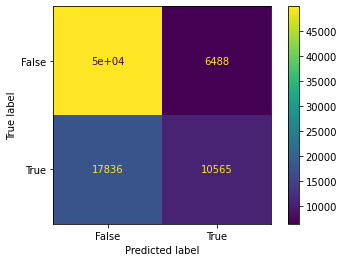

In [ ]:
plt.figure(figsize = (8,8))
confusion_matrix = metrics.confusion_matrix(y_smote_test, y_smote_pred_lr)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
auc_lr = roc_auc_score(y_smote_test, log_reg.predict_proba(X_smote_test)[:,1])
print(auc_lr)

0.7429057135849916


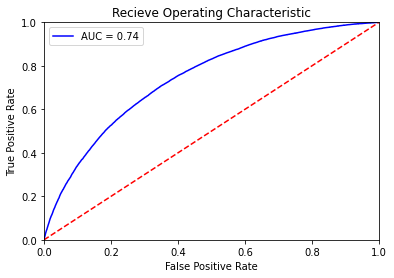

In [ ]:
probs = log_reg.predict_proba(X_smote_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_smote_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Recieve Operating Characteristic')
plt.plot(fpr, tpr, 'b', label="AUC = %0.2f" %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

In [ ]:
print (classification_report(y_smote_test, y_smote_pred_lr))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80     56405
           1       0.62      0.37      0.46     28401

    accuracy                           0.71     84806
   macro avg       0.68      0.63      0.63     84806
weighted avg       0.70      0.71      0.69     84806



### Random Forest

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_smote_train, y_smote_train)

RandomForestClassifier()

In [ ]:
y_smote_pred_rfc = rfc.predict(X_smote_test)

In [ ]:
print(rfc.score(X_smote_test, y_smote_test))

0.9284248755984247


In [ ]:
cm_rfc = metrics.confusion_matrix(y_smote_test, y_smote_pred_rfc)
print ("Confusion Matrix : \n", cm_rfc)

Confusion Matrix : 
 [[55670   735]
 [ 5335 23066]]


<Figure size 576x576 with 0 Axes>

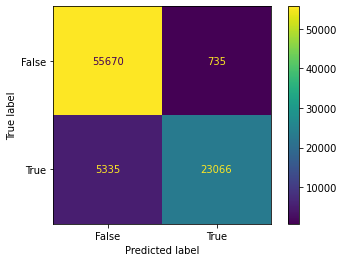

In [ ]:
plt.figure(figsize = (8,8))
confusion_matrix = metrics.confusion_matrix(y_smote_test, y_smote_pred_rfc)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
auc_rfc = roc_auc_score(y_smote_test, rfc.predict_proba(X_smote_test)[:,1])
print(auc_rfc)

0.9716662440433339


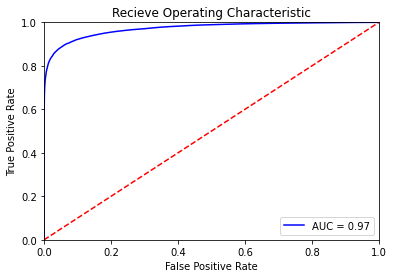

In [ ]:
probs = rfc.predict_proba(X_smote_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_smote_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Recieve Operating Characteristic')
plt.plot(fpr, tpr, 'b', label="AUC = %0.2f" %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

In [ ]:
print (classification_report(y_smote_test, y_smote_pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     56405
           1       0.97      0.81      0.88     28401

    accuracy                           0.93     84806
   macro avg       0.94      0.90      0.92     84806
weighted avg       0.93      0.93      0.93     84806



### Decision Tree

In [ ]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_smote_train, y_smote_train)

In [ ]:
y_smote_pred_dtree = dtree.predict(X_smote_test)

In [ ]:
print(dtree.score(X_smote_test, y_smote_test))

0.8425229346980166


In [ ]:
cm_dtree = metrics.confusion_matrix(y_smote_test, y_smote_pred_dtree)
print ("Confusion Matrix : \n", cm_dtree)

Confusion Matrix : 
 [[49041  7364]
 [ 5991 22410]]


<Figure size 720x720 with 0 Axes>

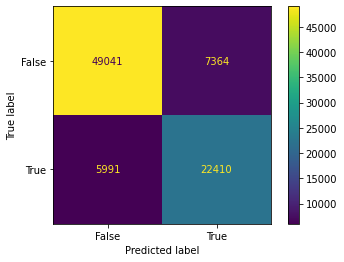

In [ ]:
plt.figure(figsize=(10,10))
confusion_matrix = metrics.confusion_matrix(y_smote_test, y_smote_pred_dtree)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
auc_dtree = roc_auc_score(y_smote_test, dtree.predict_proba(X_smote_test)[:,1])
print(auc_dtree)

0.8292504607820951


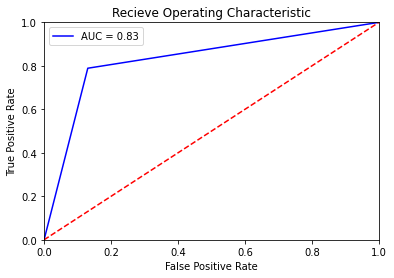

In [ ]:
import sklearn.metrics as metrics
probs = dtree.predict_proba(X_smote_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_smote_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Recieve Operating Characteristic')
plt.plot(fpr, tpr, 'b', label="AUC = %0.2f" %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

In [ ]:
print (classification_report(y_smote_test, y_smote_pred_dtree))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     56405
           1       0.75      0.79      0.77     28401

    accuracy                           0.84     84806
   macro avg       0.82      0.83      0.83     84806
weighted avg       0.84      0.84      0.84     84806



### Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_smote_train, y_smote_train)

GaussianNB()

In [ ]:
y_smote_pred_gnb = gnb.predict(X_smote_test)

In [ ]:
print(gnb.score(X_smote_test, y_smote_test))

0.6531259580690045


In [ ]:
cm_gnb = metrics.confusion_matrix(y_smote_test, y_smote_pred_gnb)
print ("Confusion Matrix : \n", cm_gnb)

Confusion Matrix : 
 [[36680 19725]
 [ 9692 18709]]


<Figure size 720x720 with 0 Axes>

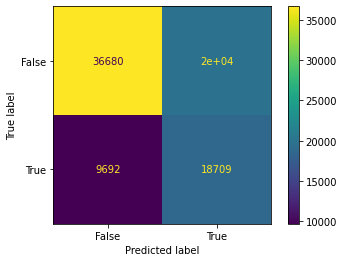

In [ ]:
plt.figure(figsize=(10,10))
confusion_matrix = metrics.confusion_matrix(y_smote_test, y_smote_pred_gnb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
auc_gnb = roc_auc_score(y_smote_test, gnb.predict_proba(X_smote_test)[:,1])
print(auc_gnb)

0.7070058994446864


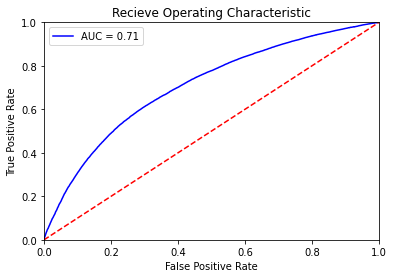

In [ ]:
probs = gnb.predict_proba(X_smote_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_smote_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Recieve Operating Characteristic')
plt.plot(fpr, tpr, 'b', label="AUC = %0.2f" %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

In [ ]:
print (classification_report(y_smote_test, y_smote_pred_gnb))

              precision    recall  f1-score   support

           0       0.79      0.65      0.71     56405
           1       0.49      0.66      0.56     28401

    accuracy                           0.65     84806
   macro avg       0.64      0.65      0.64     84806
weighted avg       0.69      0.65      0.66     84806



Kesimpulan:
Berdasarkan 3 model yang telah kami buat, diperoleh bahwa model Random Forest Classifier memiliki nilai akurasi dan nilai auc yang tinggi, yaitu 0.91 dan 0.97 sehingga kami memilih menggunakan model tersebut.

## **Feature Importance**

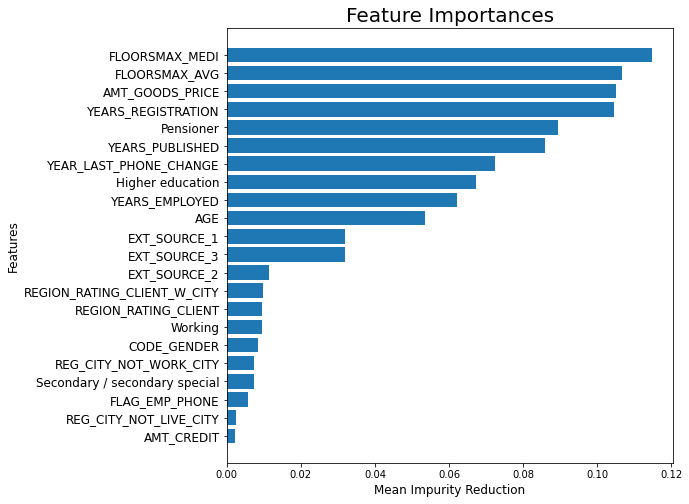

In [ ]:
tree_feature =  pd.Series(rfc.feature_importances_, X.columns).sort_values(ascending = True)
plt.figure(figsize = (8,8))
plt.barh(X.columns, tree_feature)
plt.xlabel('Mean Impurity Reduction', fontsize = 12)
plt.ylabel('Features', fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Feature Importances', fontsize = 20);

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

#Kita menggunakan explainer untuk menjelaskan output dari model. SHAP memiliki explainer khusus untuk model spesifik ataupun yang umum untuk semua model
explainer = shap.TreeExplainer(rfc)
#Perhitungan SHAP value, yaitu perhitungan bagaimana setiap fitur berkontribusi kepada prediksi yang dilakukan. Saya secara acak menggambil data di row ke 1
shap_val = explainer.shap_values(X_smote_test.iloc[1])

In [ ]:
X_smote_test['TARGET_PRED_RESULT'] = y_smote_pred_rfc
X_smote_test['TARGET'] = y_smote_test

In [ ]:
X_smote_test.head(10)

,AMT_CREDIT,REG_CITY_NOT_LIVE_CITY,FLAG_EMP_PHONE,Secondary / secondary special,REG_CITY_NOT_WORK_CITY,CODE_GENDER,Working,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,EXT_SOURCE_3,EXT_SOURCE_1,AGE,YEARS_EMPLOYED,Higher education,YEAR_LAST_PHONE_CHANGE,YEARS_PUBLISHED,Pensioner,YEARS_REGISTRATION,AMT_GOODS_PRICE,FLOORSMAX_AVG,FLOORSMAX_MEDI,TARGET_PRED_RESULT,TARGET
58543,0.201762,0.0,1.0,0,0.0,0,0,0.5,0.5,0.915004,0.597163,0.640750,0.187500,0.204082,1,0.333333,0.100000,0,0.441176,0.169473,0.333300,0.333300,0,0
326205,0.142157,0.0,1.0,1,0.0,1,0,0.5,0.5,0.728019,0.044712,0.427168,0.409981,0.020408,0,0.105348,0.636791,0,0.206716,0.116957,0.207464,0.166700,1,1
246540,0.213483,0.0,1.0,1,0.0,0,1,1.0,1.0,0.696629,0.413322,0.583537,0.541667,0.081633,0,0.000000,0.050000,0,0.382353,0.214366,0.166700,0.166700,0,0
343815,0.088082,0.0,1.0,1,0.0,0,1,1.0,1.0,0.209357,0.604469,0.518318,0.260051,0.041533,0,0.061768,0.438818,0,0.144287,0.062944,0.010791,0.010791,1,1
85445,0.059775,0.0,1.0,0,1.0,0,1,0.5,0.5,0.820428,0.223789,0.271471,0.270833,0.040816,1,0.083333,0.600000,0,0.264706,0.046016,0.166700,0.166700,0,0
205101,0.271847,0.0,1.0,1,0.0,0,1,0.5,0.5,0.696734,0.369325,0.518318,0.562500,0.183673,0,0.250000,0.150000,0,0.441176,0.236813,0.041700,0.041700,0,0
373536,0.075540,0.0,1.0,1,0.0,0,1,0.5,0.5,0.755679,0.591286,0.518318,0.097894,0.054586,0,0.139560,0.082528,0,0.004783,0.076578,0.166700,0.166700,1,1
369271,0.078399,0.0,1.0,0,1.0,1,0,0.5,0.5,0.590959,0.812953,0.405827,0.386740,0.067116,1,0.107390,0.042956,0,0.172225,0.071568,0.113005,0.113005,1,1
111715,0.225613,0.0,1.0,1,0.0,0,0,1.0,1.0,0.708982,0.923721,0.518318,0.729167,0.244898,0,0.333333,0.550000,0,0.191176,0.159371,0.083300,0.083300,0,0
184088,0.213483,0.0,1.0,0,1.0,0,1,0.5,0.5,0.639111,0.742982,0.787028,0.250000,0.081633,1,0.166667,0.450000,0,0.044118,0.214366,0.166700,0.166700,0,0


Loss Given Default Before Using Model

In [ ]:
Defaulters = X_smote_test.groupby(['TARGET'])['AMT_CREDIT'].sum().reset_index()
Defaulters

,TARGET,AMT_CREDIT
0,0,7832.258918
1,1,3545.386146


In [ ]:
Total_Defaulters = X_smote_test.groupby(['TARGET'])['AMT_CREDIT'].count().reset_index()
Total_Defaulters

,TARGET,AMT_CREDIT
0,0,56405
1,1,28401


In [ ]:
LGDBefore = Defaulters['AMT_CREDIT'].loc[Defaulters['TARGET'] == 1]
LGDBefore

1    3545.386146
Name: AMT_CREDIT, dtype: float64

Loss Given Default After Using Model

In [ ]:
FalseNegative = (X_smote_test.loc[(X_smote_test['TARGET'] == 1) & (X_smote_test['TARGET_PRED_RESULT'] == 0)])
FalseNegative.shape

(5335, 24)

In [ ]:
LGDAfter = FalseNegative['AMT_CREDIT'].sum()
LGDAfter

712.544995781241

In [ ]:
LGDAfter - LGDBefore

1   -2832.84115
Name: AMT_CREDIT, dtype: float64

In [ ]:
LGD_Decreased_Percentage = ((LGDAfter-LGDBefore)/LGDBefore)*100
LGD_Decreased_Percentage

1   -79.902189
Name: AMT_CREDIT, dtype: float64